In [1]:
# import libraries
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np

scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')
cr.settings.verbosity = 2

In [152]:
## try directly
adata = scv.read("cryo_fte_novasseq_grch38_salmon_norm_se_with_embeddings_forscvelo.h5ad")

In [153]:
adata

AnnData object with n_obs × n_vars = 294 × 60329
    obs: 'sample', 'NumGenesExpressed', 'sizeFactor', 'cluster', 'lib.size', 'epcam', 'cd44', 'itga6', 'cd34', 'tubb4', 'pax8', 'cd45', 'cd11c', 'cd14', 'cd133', 'sox2', 'nanog', 'oct4', 'cd105', 'cd90', 'cd73', 'tgfb1', 'bmp4', 'sox17', 'crlf1', 'foxj1', 'ccdc17', 'ccdc78', 'krt7', 'krt17', 'wt1', 'cd3', 'cd4', 'cd1a', 'cd69', 'cd103', 'cd11b', 'cd16b', 'calb2', 'tp53', 'klf4', 'sparcl1', 'rbp1', 'aldh1', 'mcam', 'pdgfrb', 'susd2'
    var: 'symbol'
    obsm: 'PCA', 'PCAsub', 'TSNE', 'denSNE', 'densMAP'
    layers: 'spliced', 'unspliced'

In [154]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=1000)

Filtered out 39124 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.


In [142]:
adata.var['symbol']['LINC01088']

'LINC01088'

In [155]:
scv.pp.moments(adata, n_pcs=5, n_neighbors=15)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [156]:
#dynamical model
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/16 cores)


  0%|          | 0/445 [00:00<?, ?gene/s]

    finished (0:00:36) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


In [157]:
#compute velocity using the stochastic model
scv.tl.velocity(adata, mode = "stochastic")

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [158]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


Renamed 'densMAP' to convention 'X_densMAP' (adata.obsm).
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_densMAP', embedded velocity vectors (adata.obsm)


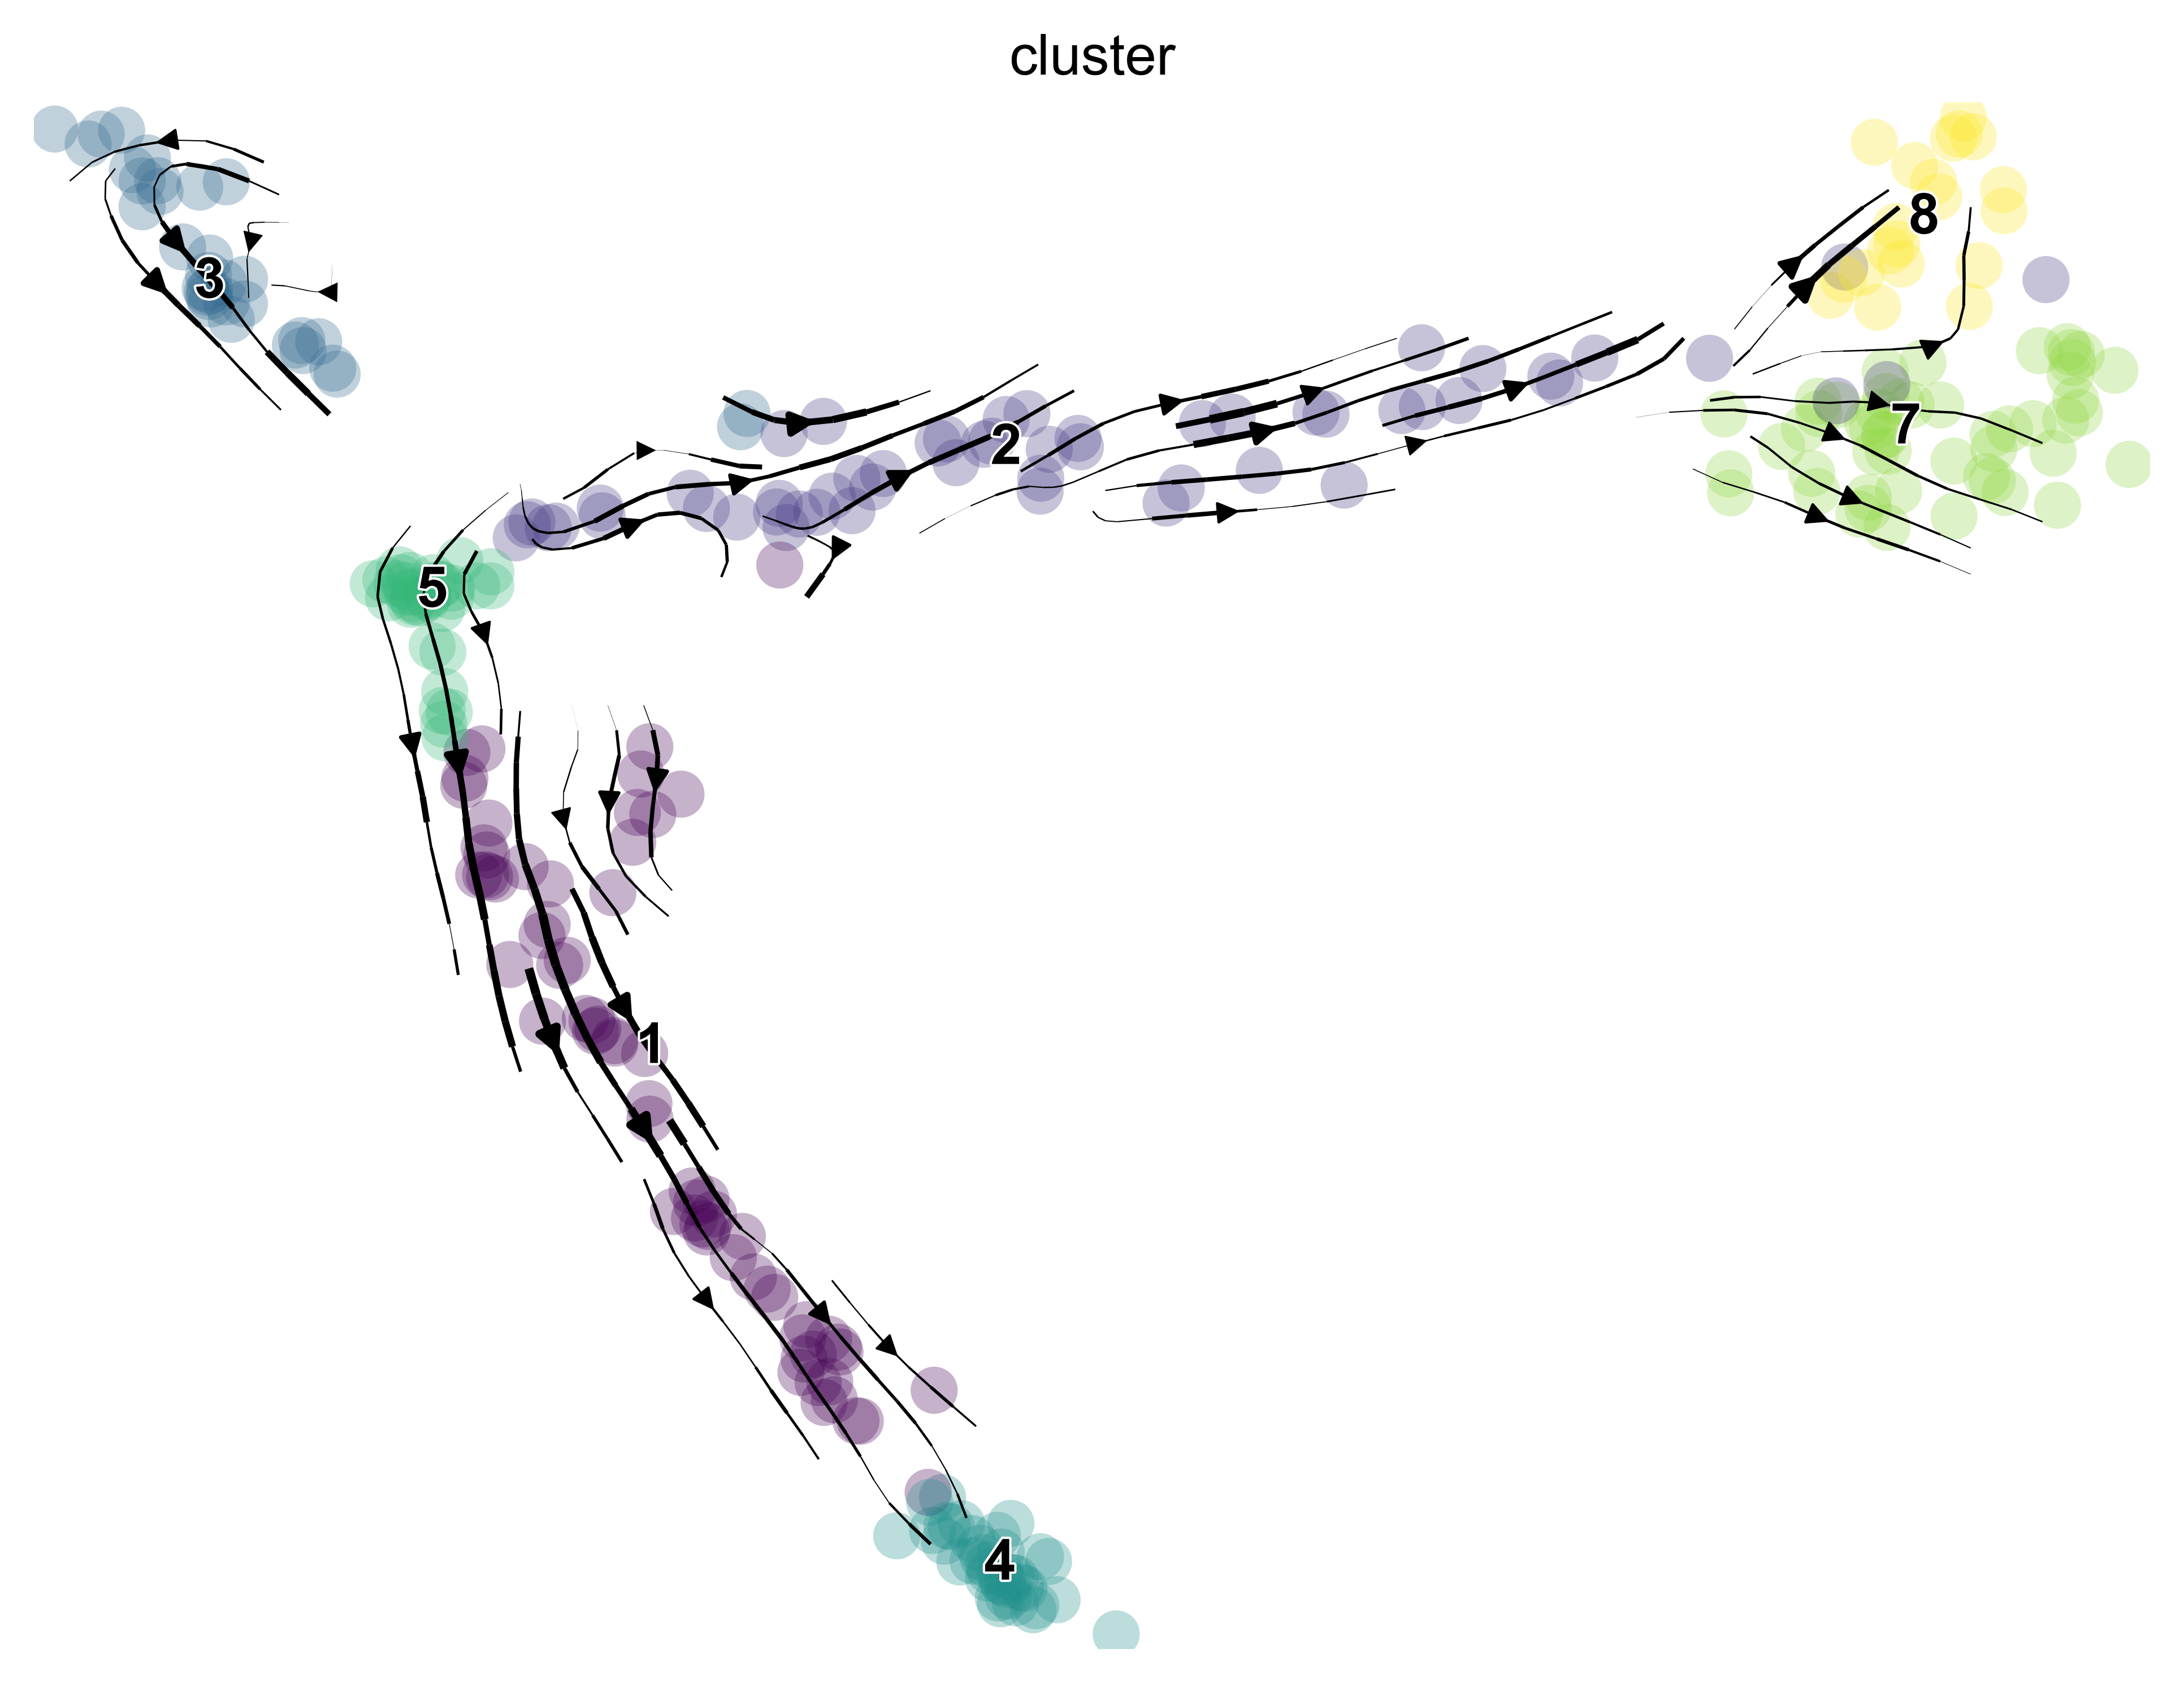

In [159]:
scv.pl.velocity_embedding_stream(adata, basis = "densMAP",
                                 color = 'cluster', palette = "viridis", 
                                 dpi = 300,
                                 figsize = (8,6), size = 400)
#scv.pl.velocity_embedding_stream(adata, basis = "TSNE",
#                                 color = 'cluster', palette = "viridis", 
#                                 dpi = 300, title = "Cryopreserved FTE RNA velocity",
#                                 figsize = (8,6), size = 400,
#                                 save = "cryo_fte_salmon_stochastic_densmap_grch38_hiseq.svg")

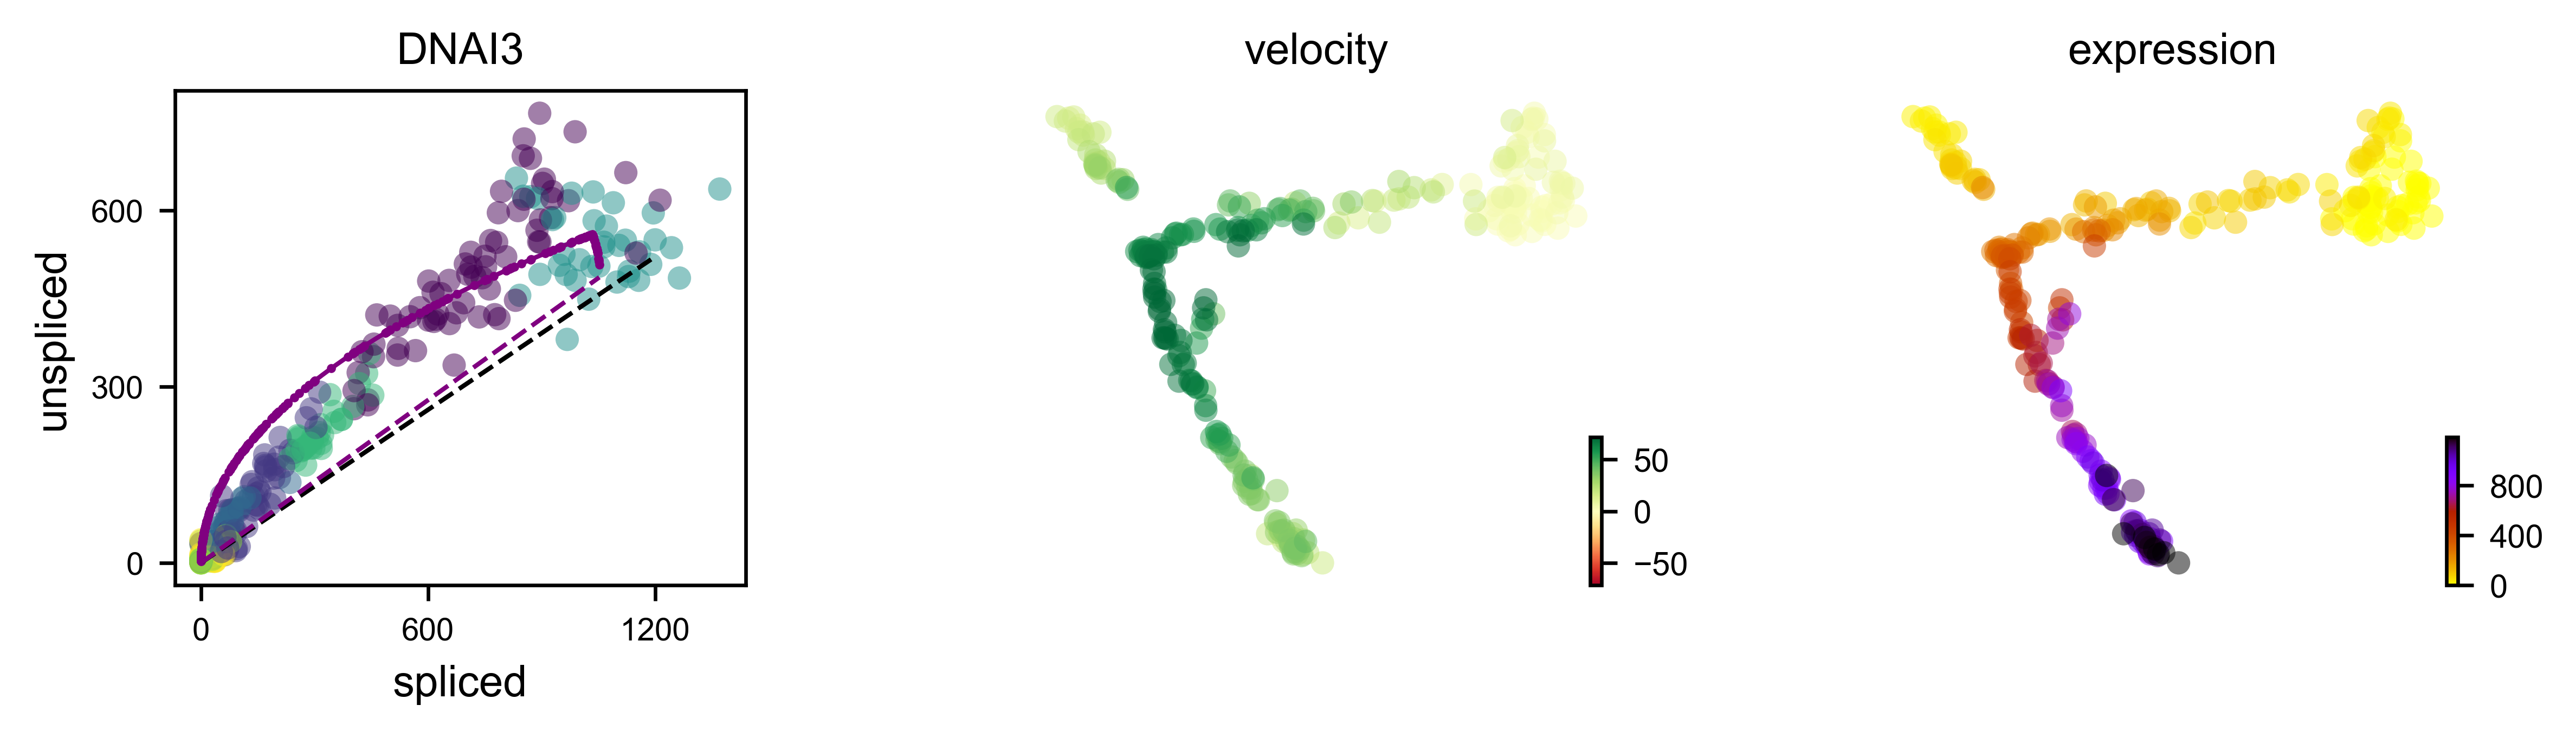

In [168]:
## look at phase portraits of key genes
scv.pl.velocity(adata, 'DNAI3', color='cluster', basis = "densMAP", dpi = 300)

In [161]:
## rank some genes
scv.tl.rank_velocity_genes(adata, groupby='cluster')

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(n=50)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,1,2,3,4,5,7,8
0,FGF14,LMCD1,SEMA4A,EYA1,MUC4,ATP10A,CXCL1
1,DCDC1,ETS1,AC084082.1,ENPP2,CFAP46,ADGRG2,RCC1
2,DNAI3,EMP1,DCN,FOXP2,Z99496.1,LAMA2,IL32
3,AC022414.1,PLEKHG2,ENG,SCN1A,AC084082.1,TPD52,ADCY8
4,RP1,TNFAIP2,TGM2,IQUB,GAS6-AS1,OVGP1,EPHA2
5,EFHC2,PTCHD4,COL4A2,ADCY2,ZEB2,MGST1,CLEC3B
6,AL121956.7,SEMA4A,MMP2,AC019117.1,VWA3A,PWWP3B,DUSP6
7,PPP1R14C,RCC1,APOLD1,MYLK3,DLEC1,CRISP2,ANKRD33B
8,AC019117.1,OBSCN,RCAN1,DUOX1,CXCL8,PIK3C2G,NLGN1
9,CFAP47,FOSL1,RAPGEF4,ADPRS,HSPA1A,SPARCL1,TIMP2


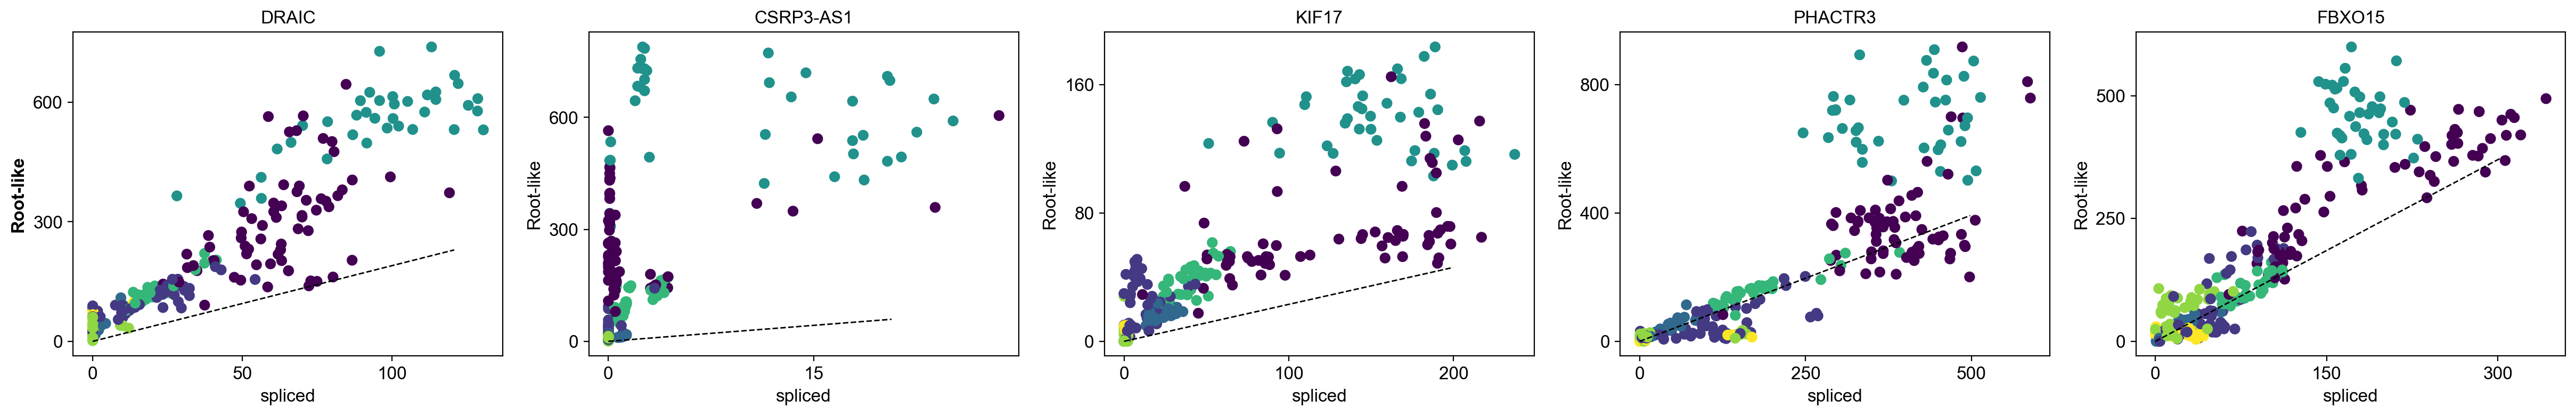

In [120]:
kwargs = dict(frameon=False, size=10, linewidth=1.5)

scv.pl.scatter(adata, df['4'][:5], ylabel='Root-like', color='cluster')
#scv.pl.scatter(adata, df['Pre-endocrine'][:5], ylabel='Pre-endocrine', **kwargs)

In [163]:
#compute velocity using the dynamical model
scv.tl.velocity(adata, mode = "dynamical")
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


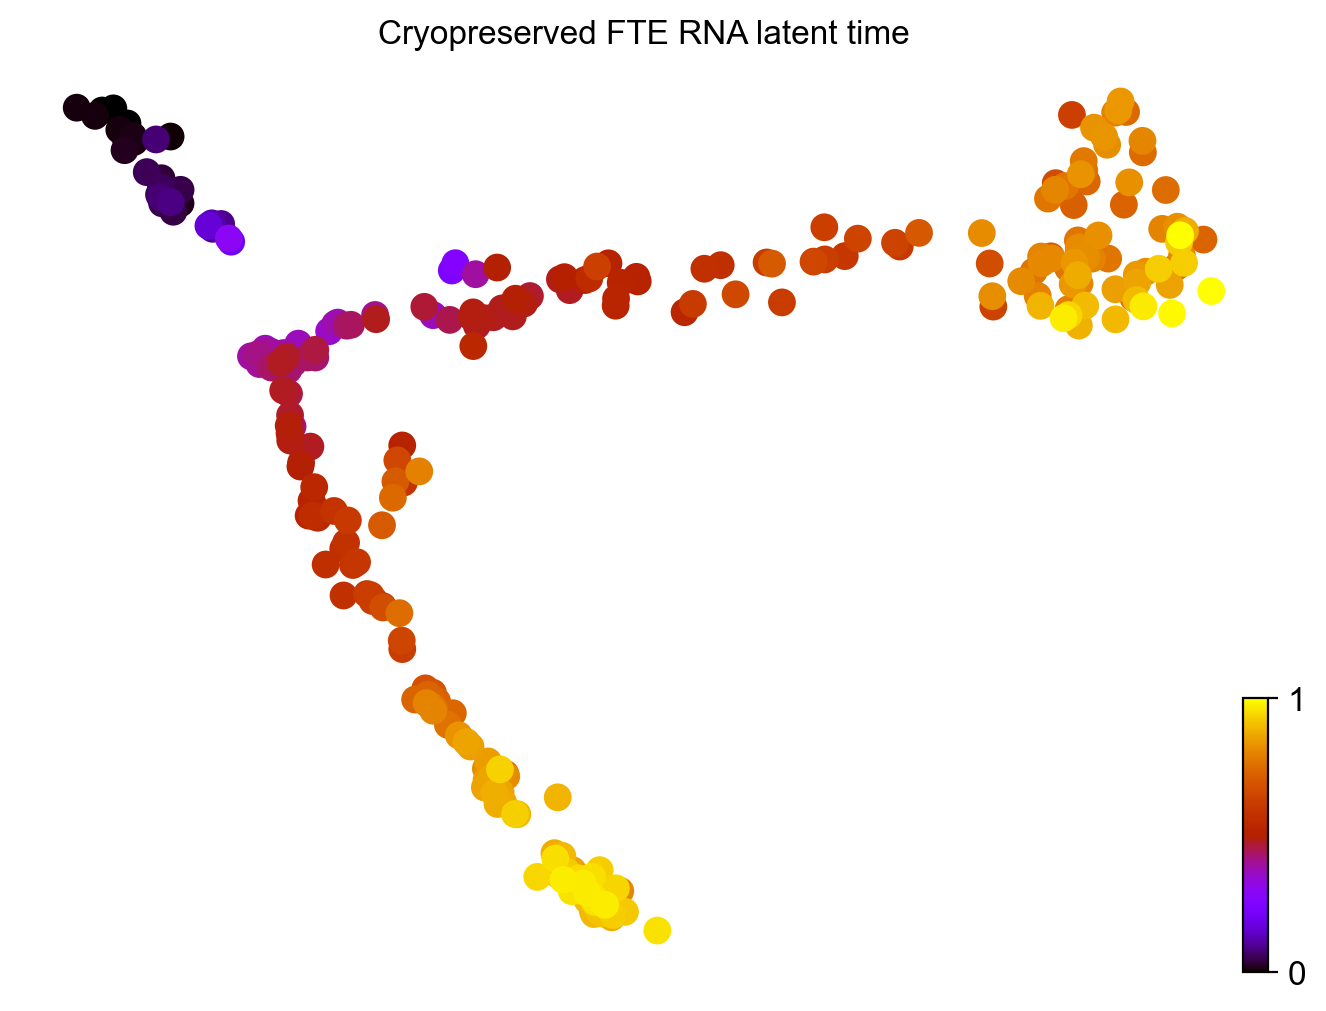

In [164]:
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=400, colorbar=True, basis="densMAP",
               figsize = (8,6), title = "Cryopreserved FTE RNA latent time")

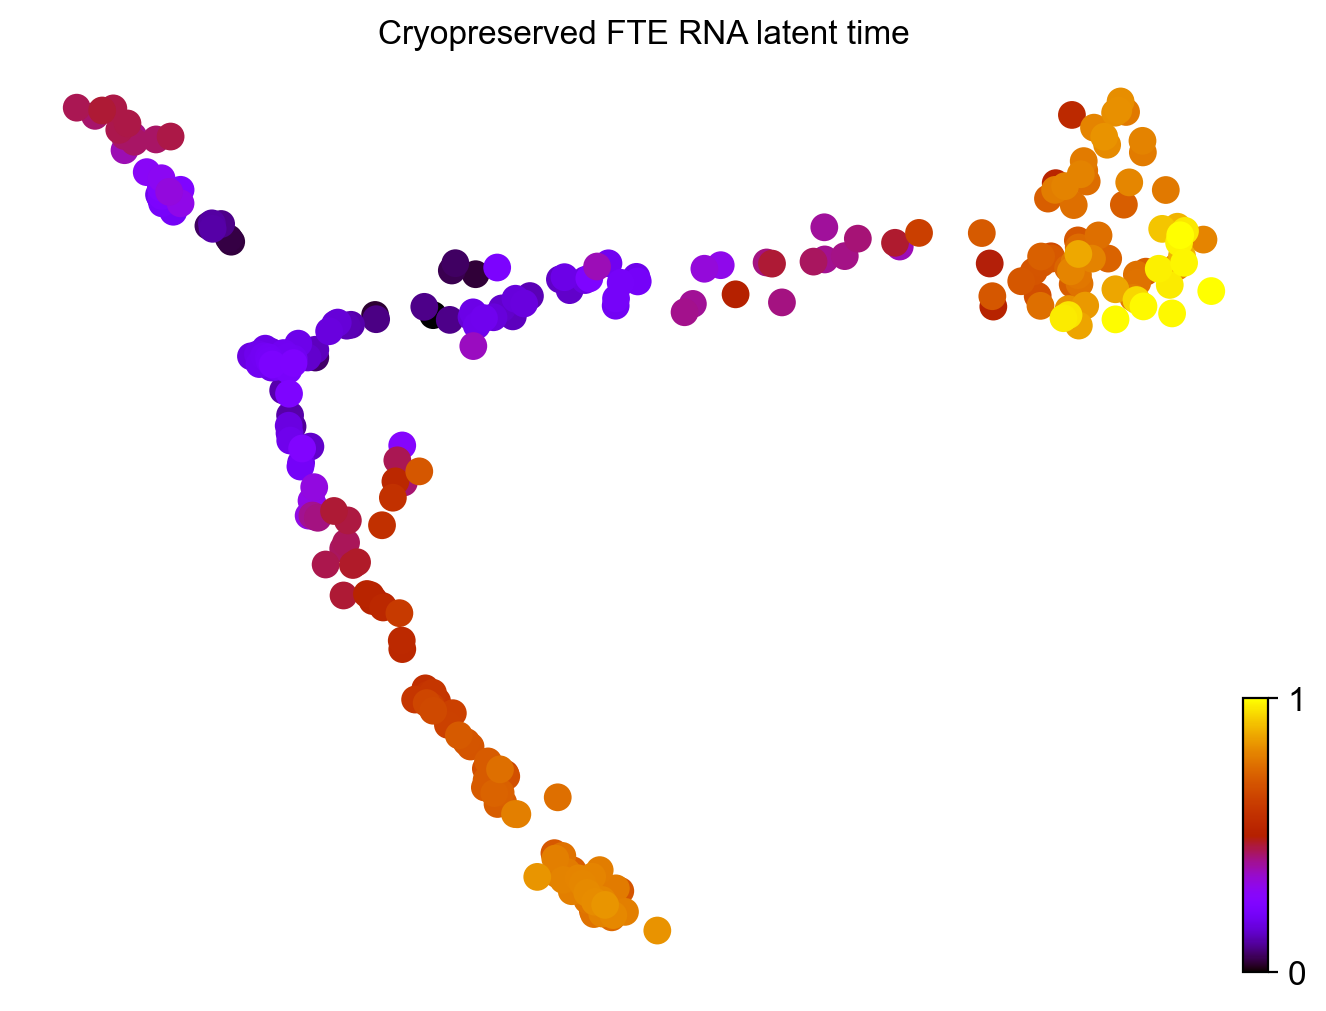

In [28]:
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=400, colorbar=True, basis="densMAP",
               figsize = (8,6), title = "Cryopreserved FTE RNA latent time")

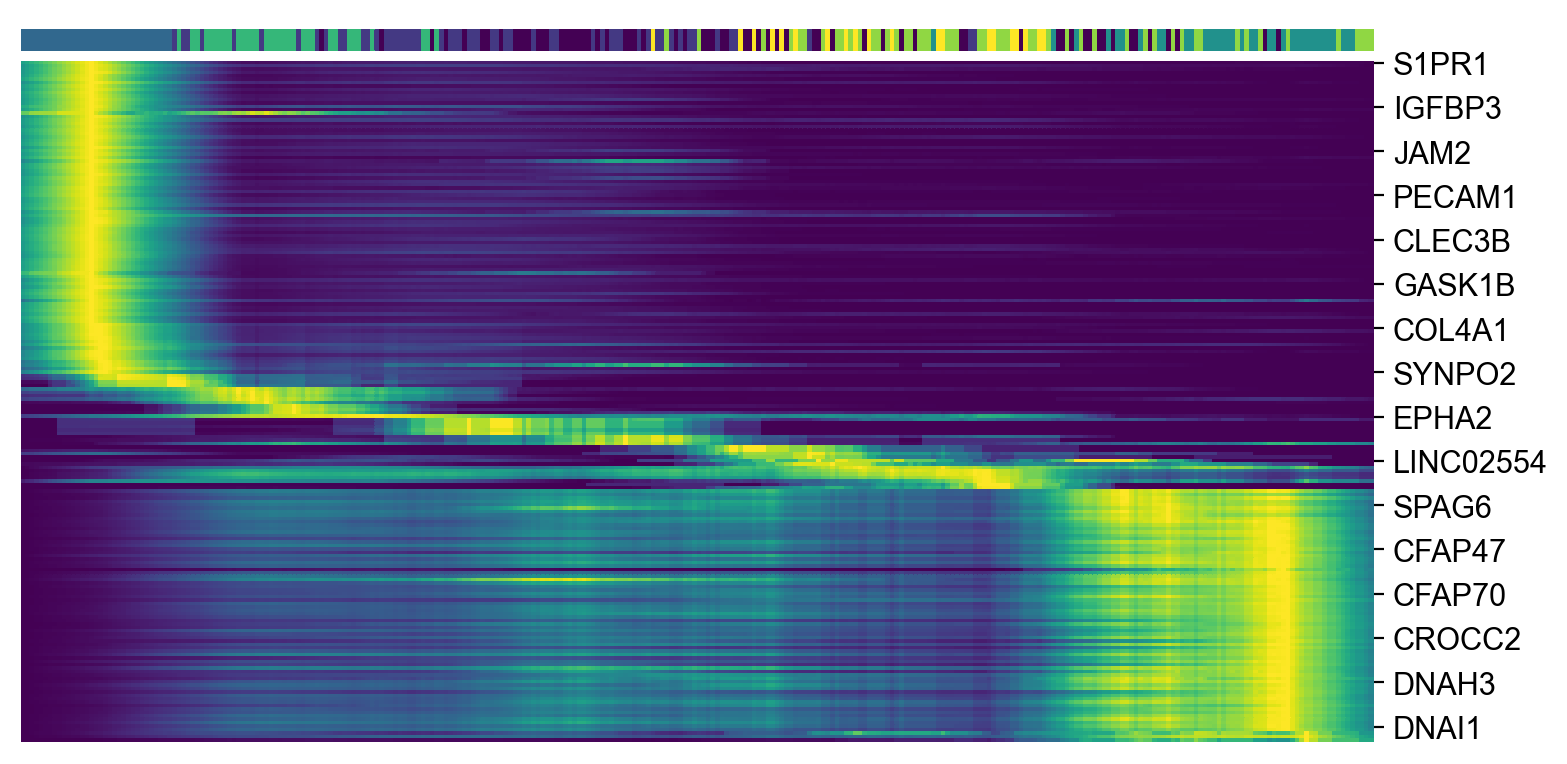

In [165]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:200]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', col_color='cluster')

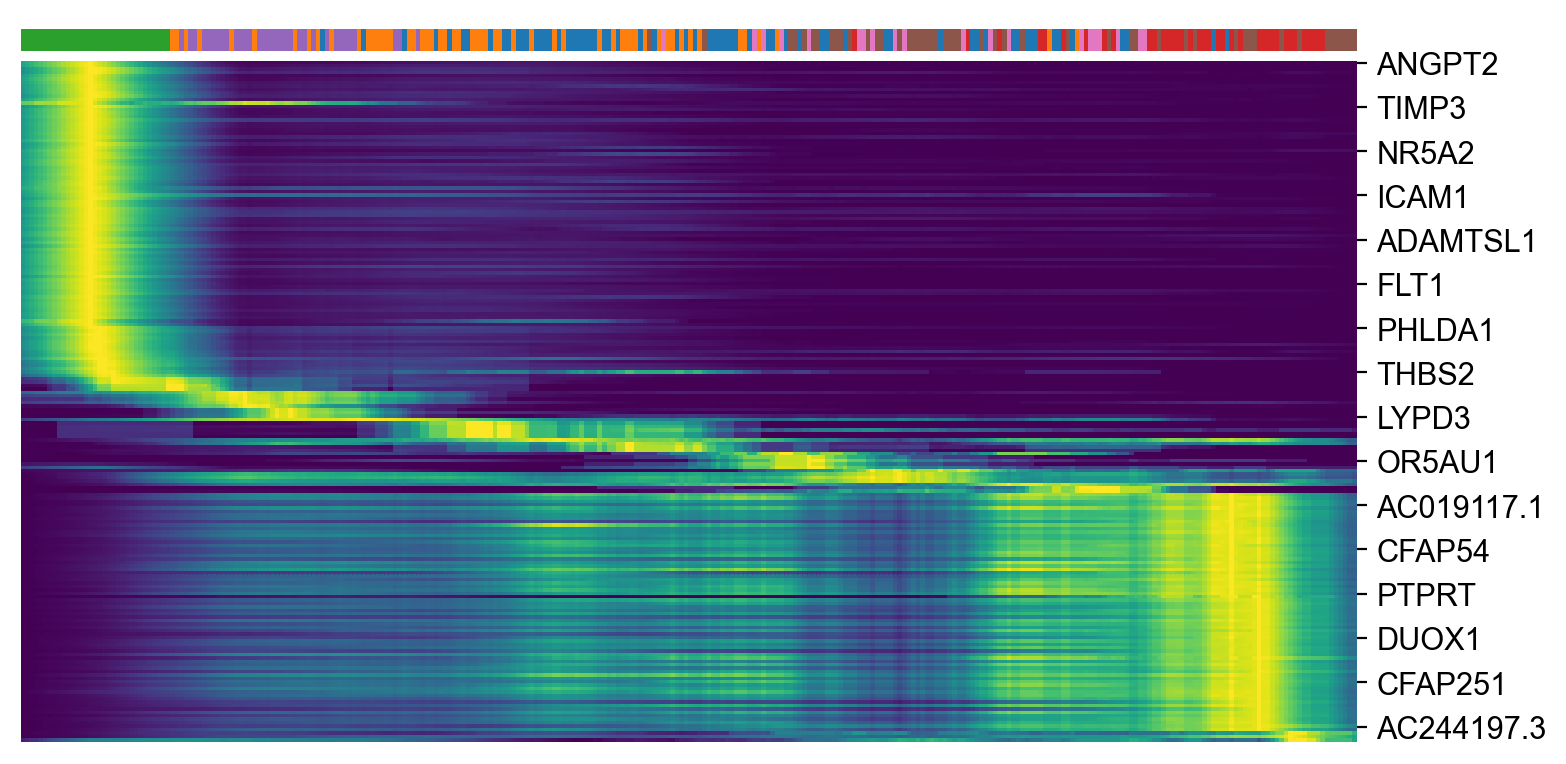

In [14]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:200]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', col_color='cluster')

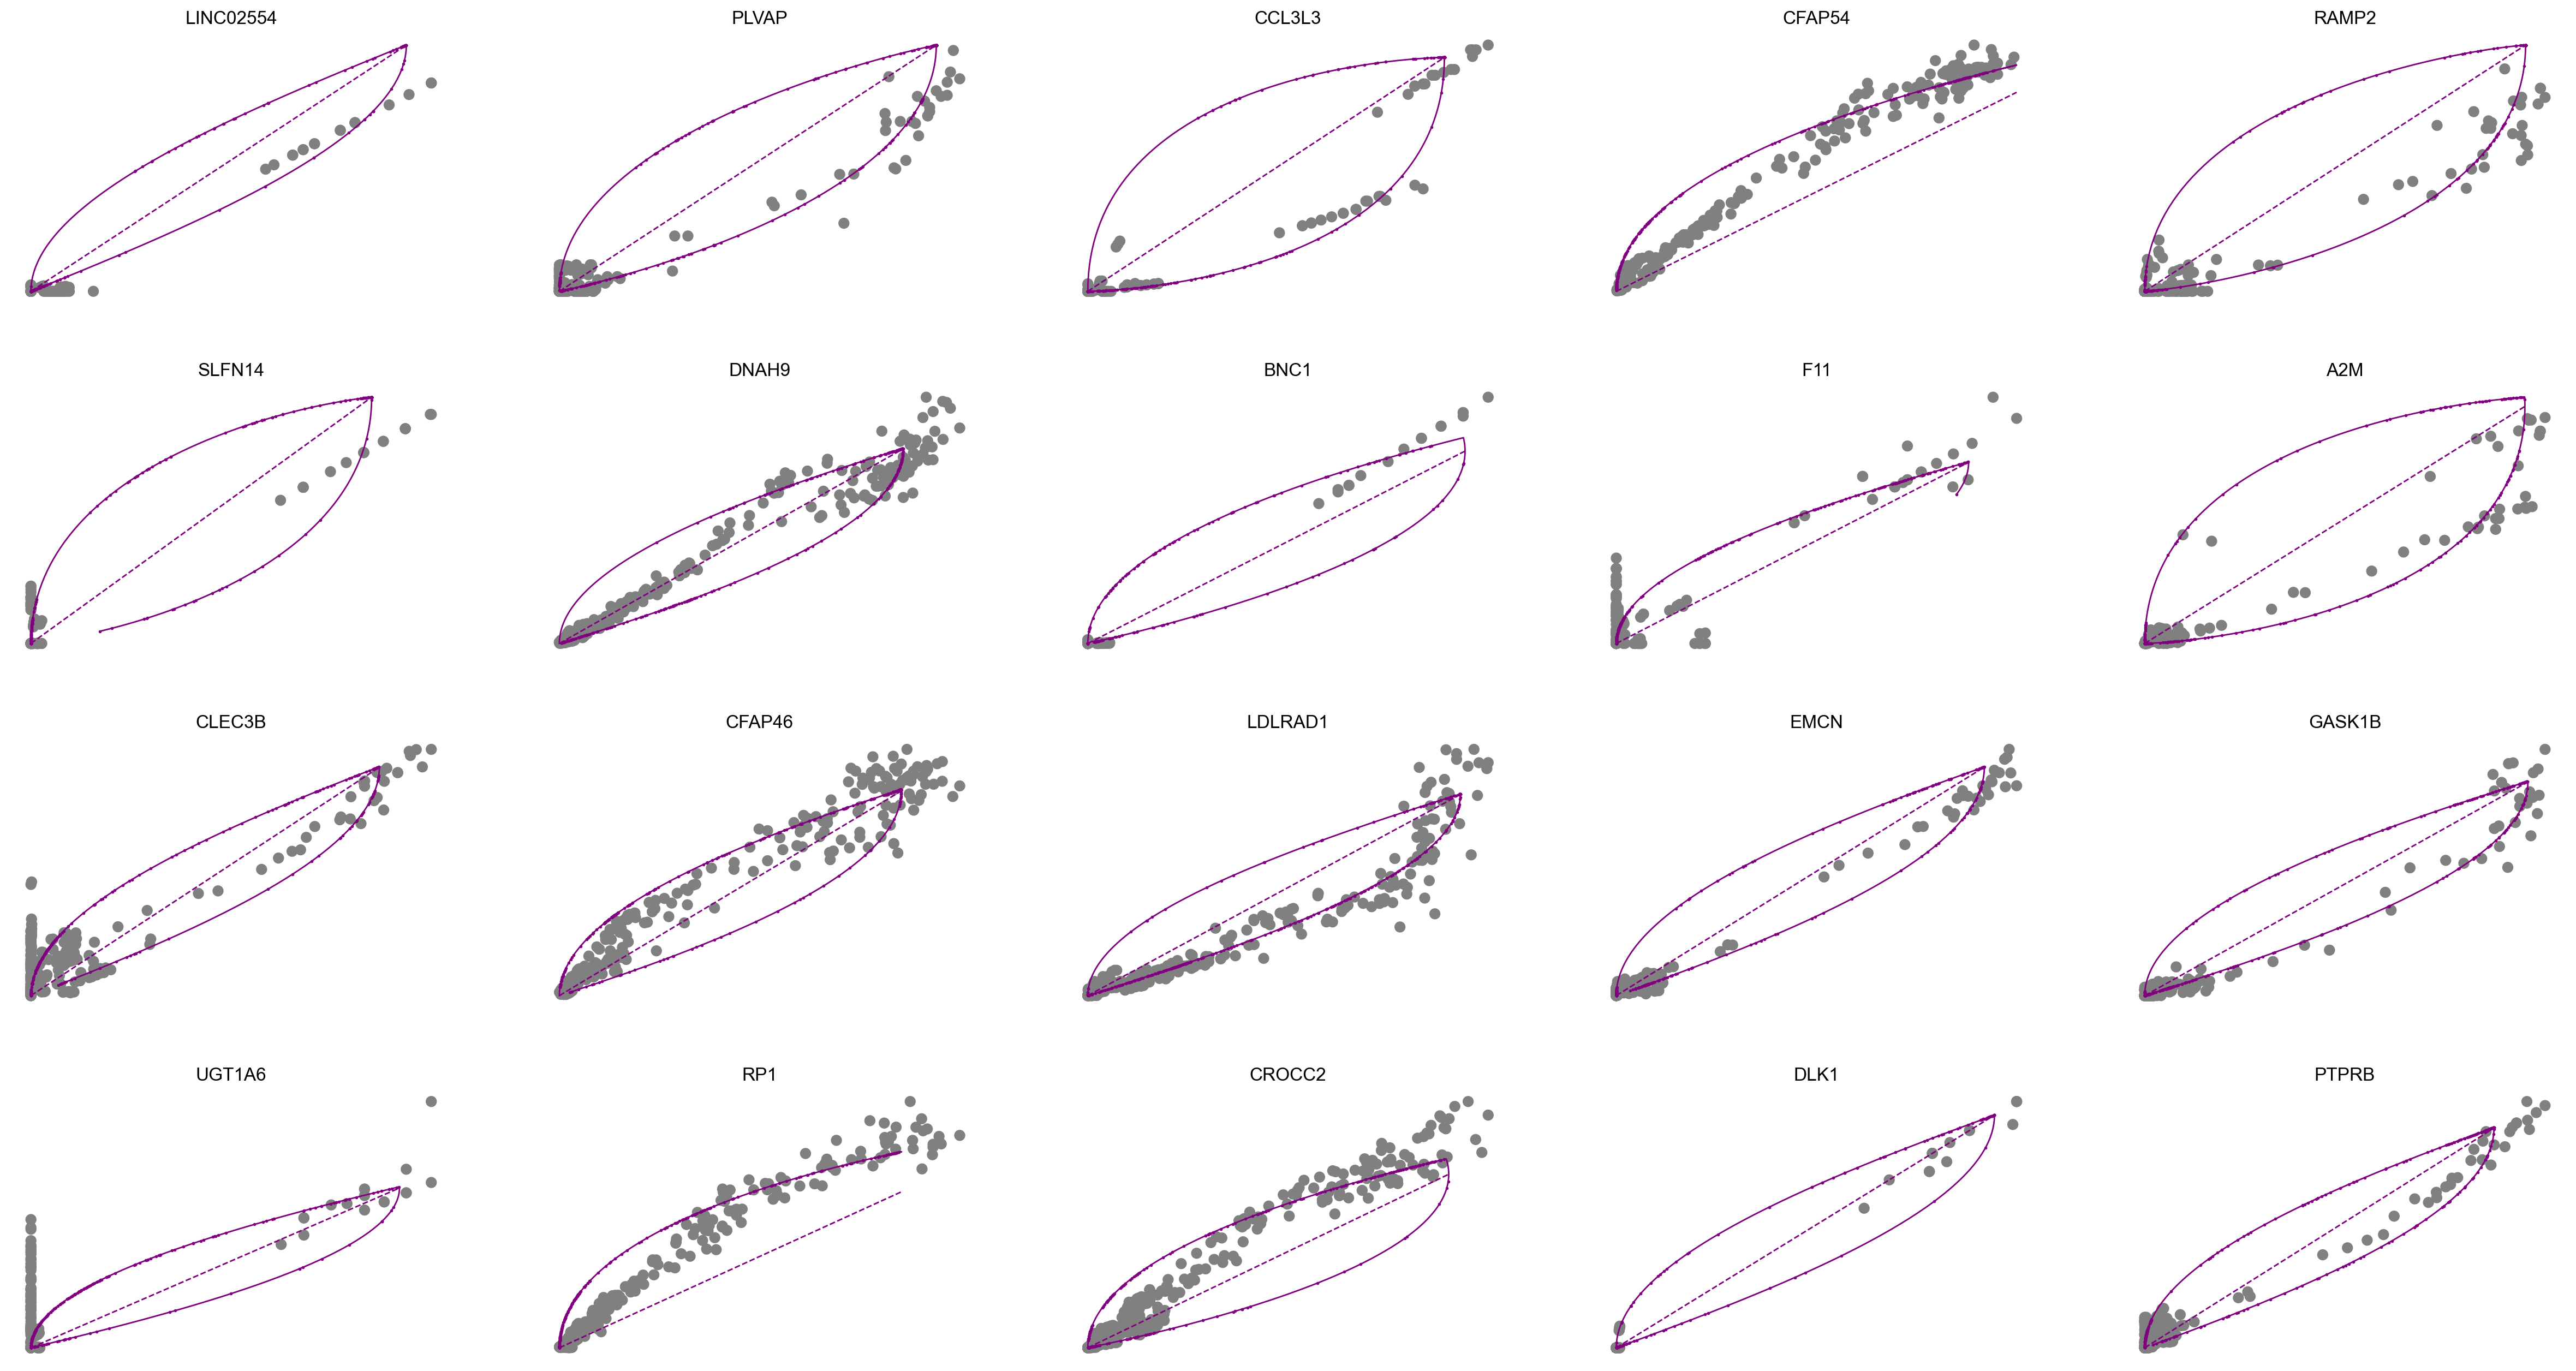

In [22]:
scv.pl.scatter(adata, basis=top_genes[:20], frameon=False, ncols=5)

Using precomputed transition matrix
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eig_fwd']`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `.macrostates_memberships`
        `.macrostates`
    Finish (0:00:00)
Adding `adata.obs['terminal_states_probs']`
       `adata.obs['terminal_states']`
       `adata.obsm['macrostates_fwd']`
       `.terminal_states_probabilities`
       `.terminal_states`
    Finish


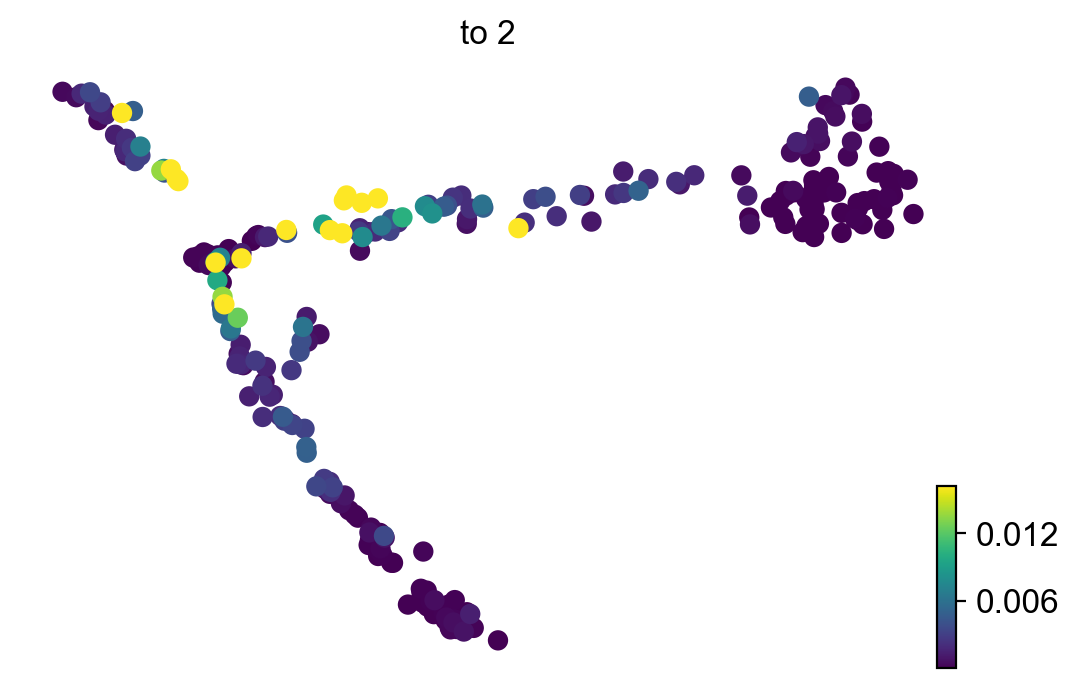

In [20]:
cr.tl.terminal_states(adata, cluster_key='cluster')
cr.pl.terminal_states(adata, basis = "densMAP")

Using precomputed transition matrix
Computing eigendecomposition of the transition matrix
Adding `.eigendecomposition`
       `adata.uns['eig_bwd']`
    Finish (0:00:00)
Adding `.macrostates_memberships`
        `.macrostates`
    Finish (0:00:00)
Adding `adata.obs['initial_states_probs']`
       `adata.obs['initial_states']`
       `adata.obsm['macrostates_bwd']`
       `.terminal_states_probabilities`
       `.terminal_states`


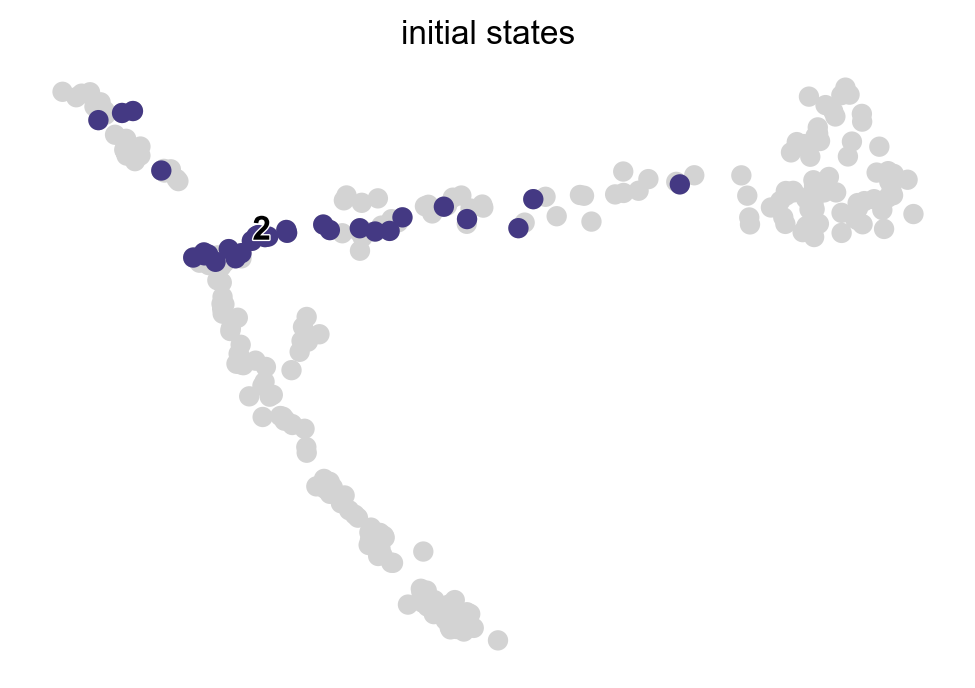

In [14]:
cr.tl.initial_states(adata, mode = "stochastic", n_states = 1, cluster_key='cluster')
cr.pl.initial_states(adata, discrete=True, basis = "densMAP")

In [10]:
from cellrank.tl.kernels import CytoTRACEKernel
ctk = CytoTRACEKernel(adata)

Computing CytoTRACE score with `10000` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:00)


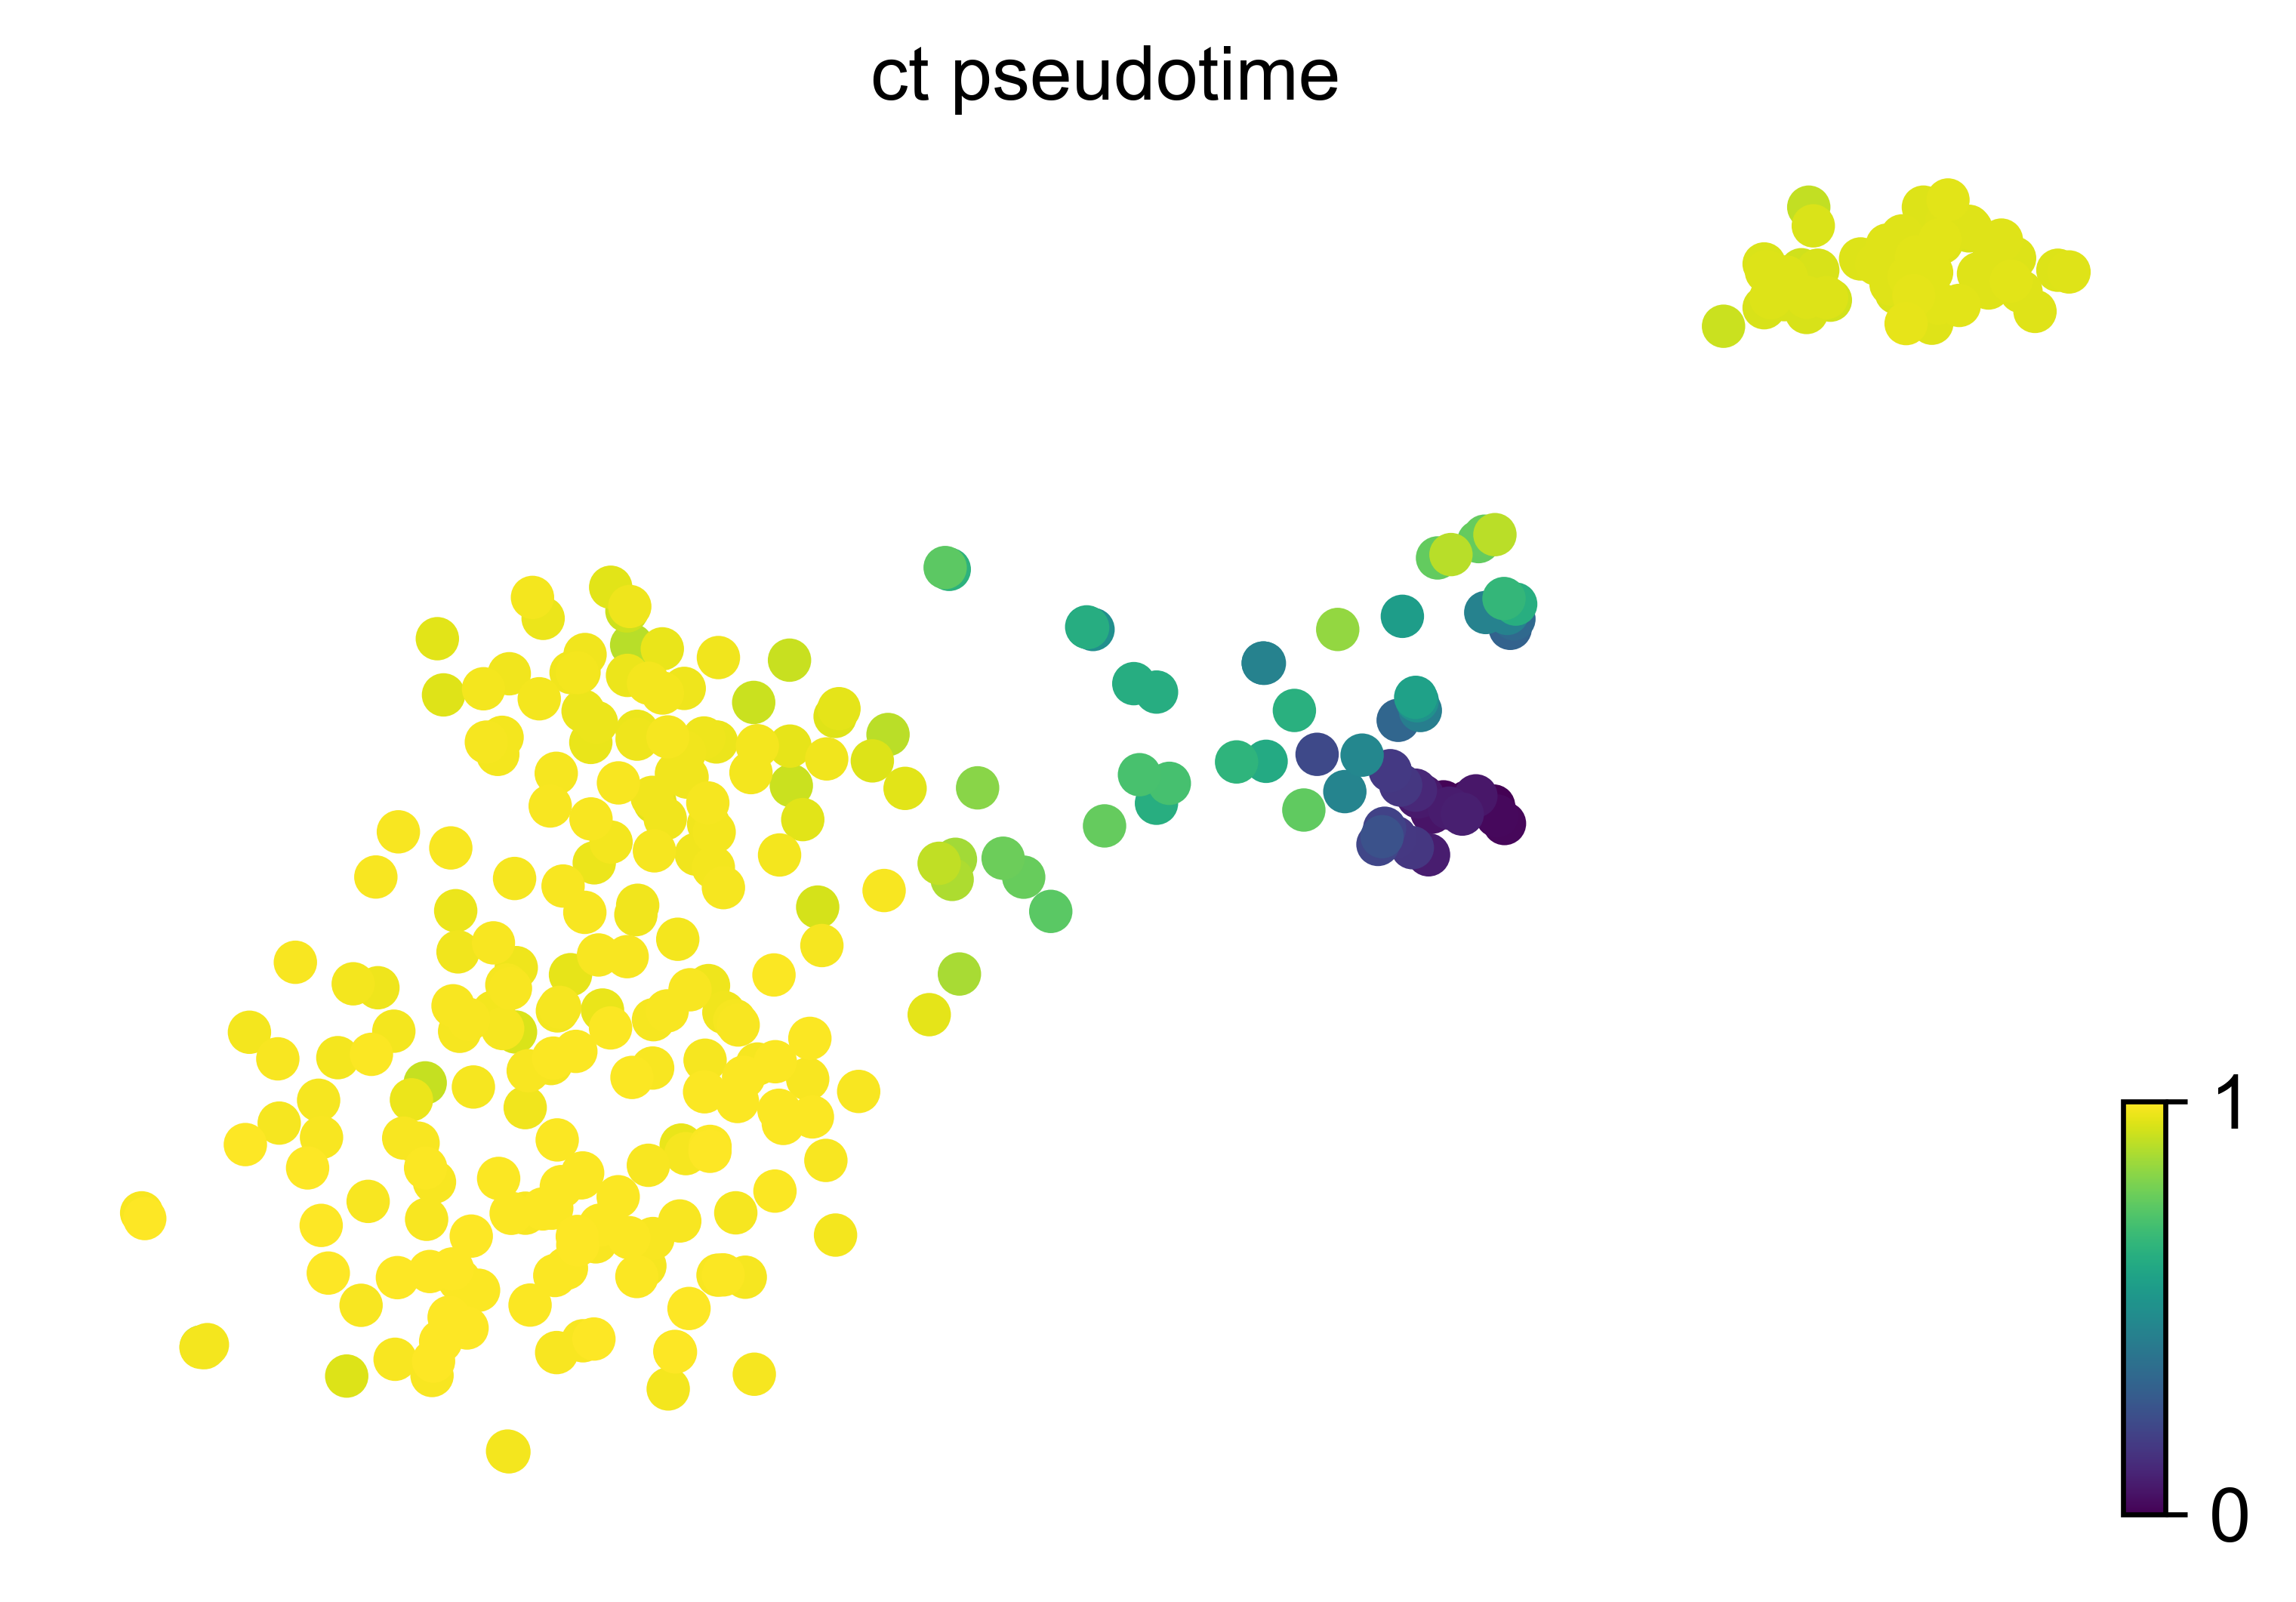

In [12]:
scv.pl.scatter(adata, c='ct_pseudotime',
               basis='TSNE', legend_loc='right', color_map='viridis', dpi = 300)

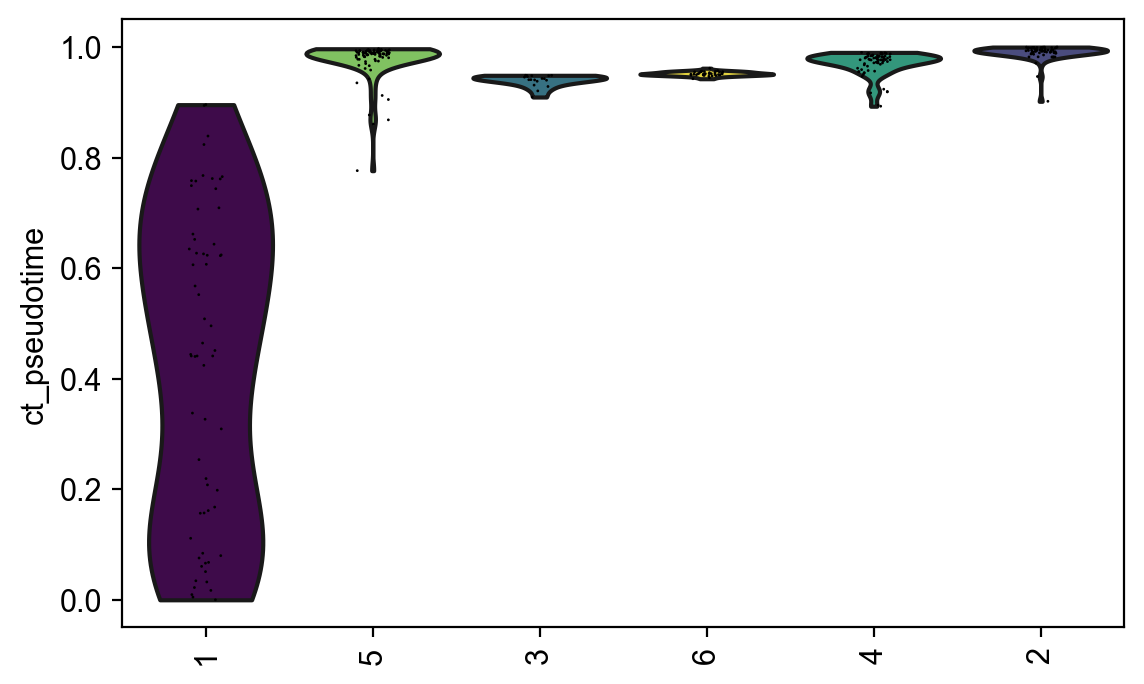

In [14]:
sc.pl.violin(adata, keys=['ct_pseudotime'], groupby='cluster', rotation=90, order = ['1', '5', '3', '6', '4', '2'],
            dpi = 300, save = "cytotrace_pseudotime_by_cluster_violin_hiseq_top10k.svg")

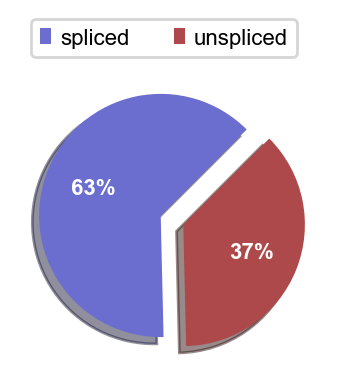

In [7]:
scv.pl.proportions(adata)

In [44]:
import sys
print(sys.version)

3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) 
[Clang 6.0 (clang-600.0.57)]


In [3]:
print(scv.__version__)
print(sc.__version__)
print(cr.__version__)

0.2.3
1.7.1
1.3.1
